# Assignmnet 2 -kNN

- Sameer Valiah Pusunuru (1001552473)

In [25]:
import pandas as pd
import numpy as np
import math
#Taking IRIS datset and storing in data fram
col=['sepal_len','sepal_width','petal_len','petal_width','type']
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",names=col)


Creating Dev Set and Test set, 100 dev data rows and 50 test row

In [26]:
shuffled = df.sample(frac=1)
result = np.array_split(shuffled, 3)
x =result[0]
x1= result[1]
test =result[2]
dev = np.concatenate((x, x1), axis=0)
test = np.array(test)


Functions to find euclidean, consine and normalized euclidean distances

In [27]:
import math
import statistics as st
def euclidean(tar,dat):
    stry =0.0
    for i in range (0,4):
        stry =stry+pow((tar[i]-dat[i]),2) 
    return math.sqrt(stry)



def cosine_similarity(tar,dat):
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(0,4):
        x = tar[i]; y = dat[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    #print(sumxy/math.sqrt(sumxx*sumyy))
    return sumxy/math.sqrt(sumxx*sumyy)

def normeuclidean(tar,dat):
    a=[]
    b=[]
    for i in range (0,4):
        a.append(tar[i])
        b.append(dat[i])
    c=[]
    for i in range (0,len(a)):
        c.append(a[i]-b[i])
         
    return 0.5*(pow(st.stdev(c),2)) / ((pow(st.stdev(a),2))+(pow(st.stdev(b),2)))

function to find accuracy on a given data set using euclidean distance 

In [28]:
def equi(k,dataset):

    srt = [[0 for x in range(len(dataset))] for y in range(len(dataset))] 
    hyper =k
    fin =0
    for j in range (0,len(dataset)):
        mydct={}
        x={}
        for i in range (0,len(dataset)):
            mydct[(euclidean(dev[j],dev[i]))] = dev[i][4]
        count=0;
    #print(dev[j][4])
        mydct
        for i in sorted (mydct) : 
            if(count==0):
                count+=1;
                continue
            elif( count <= hyper):
                if mydct[i] in x:
                    x[mydct[i]]=(x[mydct[i]]+1)
                else:
                    x[mydct[i]] = 1
                count+=1
            else:
                break;
        if dev[j][4] in x:
            if(x[dev[j][4]]>=((hyper+1)/2)) :
                fin+=1
        
        #print(x)  
    return ((fin/len(dataset))*100)    



function to find accuracy on a given data set using consine similarity distance 

In [29]:
def cos(k,dataset):

    w, h = len(dataset), len(dataset);

    srt = [[0 for x in range(w)] for y in range(h)] 
    hyper =k
    fin =0
    for j in range (0,len(dataset)):
        mydct={}
        x={}
        for i in range (0,len(dataset)):
            mydct[(cosine_similarity(dev[j],dev[i]))] = dev[i][4]
        count=0;
    #print(dev[j][4])
        mydct
        for i in sorted (mydct,reverse=True) : 
            if(count==0):
                count+=1;
                continue
            elif( count <= hyper):
                if mydct[i] in x:
                    x[mydct[i]]=(x[mydct[i]]+1)
                else:
                    x[mydct[i]] = 1
                count+=1
            else:
                break;
        if dev[j][4] in x:
            if(x[dev[j][4]]>=((hyper+1)/2)) :
                fin+=1
        
        #print(x)  
    return ((fin/len(dataset))*100) 

function to find accuracy on a given data set using normalized euclidean distance 

In [30]:
def norm(k,dataset):

    w, h = len(dataset), len(dataset);

    srt = [[0 for x in range(w)] for y in range(h)] 
    hyper =k
    fin =0
    for j in range (0,len(dataset)):
        mydct={}
        x={}
        for i in range (0,len(dataset)):
            mydct[(normeuclidean(dev[j],dev[i]))] = dev[i][4]
        count=0;
    #print(dev[j][4])
        mydct
        for i in sorted (mydct) : 
            if(count==0):
                count+=1;
                continue
            elif( count <= hyper):
                if mydct[i] in x:
                    x[mydct[i]]=(x[mydct[i]]+1)
                else:
                    x[mydct[i]] = 1
                count+=1
            else:
                break;
        if dev[j][4] in x:
            if(x[dev[j][4]]>=((hyper+1)/2)) :
                fin+=1
        
        #print(x)  
    return ((fin/len(dataset))*100) 

finding accuracy for train dataset using all  different hyperparemeters(1,3,5,7) on each distance measure(euclidean,cosine,norm euclidean)

In [31]:
count=0;
a=[]
b=[]
c=[]
print("Train data set size :- "+(str)(len(dev)))
for i in 1,3,5,7:
    a.append(equi(i,dev))
    b.append(cos(i,dev))
    c.append(norm(i,dev))
print(a,b,c)

Train data set size :- 100
[95.0, 95.0, 93.0, 94.0] [96.0, 97.0, 97.0, 96.0] [93.0, 97.0, 96.0, 95.0]


creating bar graph for the accuracys results on train set

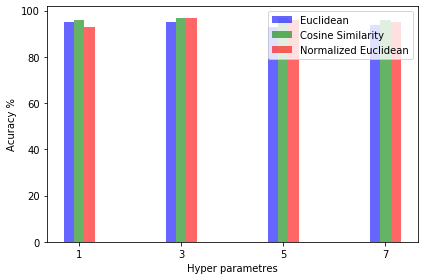

In [33]:
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.6

rects1 = plt.bar(index, a, bar_width,
alpha=opacity,
color='b',
label='Euclidean')

rects2 = plt.bar(index + bar_width, b, bar_width,
alpha=opacity,
color='g',
label='Cosine Similarity')

rects3 = plt.bar(index + bar_width+ bar_width, c, bar_width,
alpha=opacity,
color='r',
label='Normalized Euclidean')

plt.xlabel('Hyper parametres')
plt.ylabel('Acuracy %')
plt.title('')
plt.xticks(index + bar_width, ('1', '3', '5', '7'))
plt.legend()

plt.tight_layout()
plt.show()

Choosing the hyerparameter and distance measure to predict the accuracy on test dataset.

In [37]:
print("Test data set size :- "+(str)(len(test)))

print("For the finaly accuracy I choose consine simliarity with hyperparmeter as 5 and acuracy on test data is : " + (str)(cos(5,test))+" %")


Test data set size :- 50
For the finaly accuracy I choose consine simliarity with hyperparmeter as 5 and acuracy on test data is : 98.0 %


Refrences :
https://pythonspot.com/matplotlib-bar-chart/

https://stackoverflow.com/questions/38161071/how-to-calculate-normalized-euclidean-distance-on-two-vectors/54170399

https://docs.python.org/3/library/statistics.html#statistics.stdev



